# Linear Regression

We will analyze

* True versus predicted functions
* Shifting and scaling
* Adding additional features
* Regularization

In [3]:
%matplotlib inline
import localutils as lu
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from matplotlib import pylab
pylab.rcParams['figure.figsize'] = (10.0, 8.0)

## 1-Feature Case

In [21]:
# Size of the dataset
N = 100

In [22]:
# The input. Can be generated any function you like. Here, I generated it from a normal distribution
a = np.random.normal(3, 2, N)

In [23]:
# The true function
def f(x):
    return 5*x+1

In [30]:
# Data; need to reshape it for scikit-learn
X = a.reshape(-1, 1)
# The training data points; they are a noisy version of the true function
y = np.random.normal(f(a), 3)

In [33]:
m = LinearRegression()
m.fit(X, y)
print(m.coef_)
print(m.intercept_)

[4.76960618]
2.435934357349179


As we can see above, the linear regression is able to learn the parameters fairly accurately.

Let's plot the training data, the true function, and the learned function.

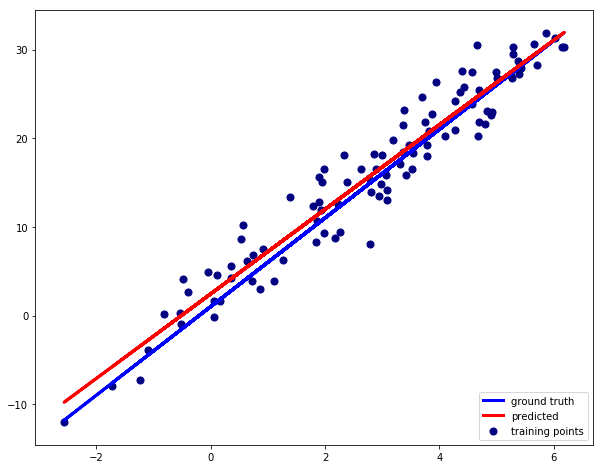

In [34]:
lw=3
plt.plot(a, f(a), color='blue', linewidth=lw, label="ground truth")
plt.scatter(a, y, color='navy', s=50, marker='o', label="training points")
plt.plot(a, m.predict(X), color='red', linewidth=lw, label="predicted")
plt.legend(loc='lower right')

### Shift the input feature by a constant

In [35]:
b = a - 6
X = b.reshape(-1, 1)
m = LinearRegression()
m.fit(X, y)
print(m.coef_)
print(m.intercept_)

[4.76960618]
31.053571449331493


In [38]:
m.coef_[0]*6

28.617637091982317

As expected, the coefficient did not change, whereas intercept shifted by coef * constant.

Let's plot it.

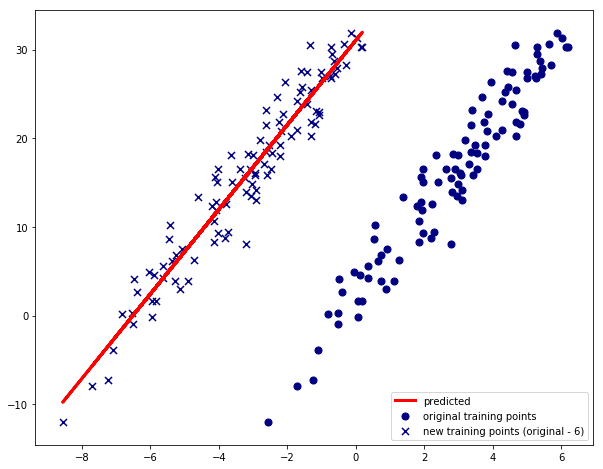

In [40]:
lw=3
plt.scatter(a, y, color='navy', s=50, marker='o', label="original training points")
plt.scatter(b, y, color='navy', s=50, marker='x', label="new training points (original - 6)")
plt.plot(b, m.predict(X), color='red', linewidth=lw, label="predicted")
plt.legend(loc='lower right')

### Scale the feature by a constant

In [42]:
b = 10*a
X = b.reshape(-1, 1)
m = LinearRegression()
m.fit(X, y)
print(m.coef_)
print(m.intercept_)

[0.47696062]
2.43593435734919


As expected, the intercept did not change, whereas coef is divided by a constant.

Let's plot it.

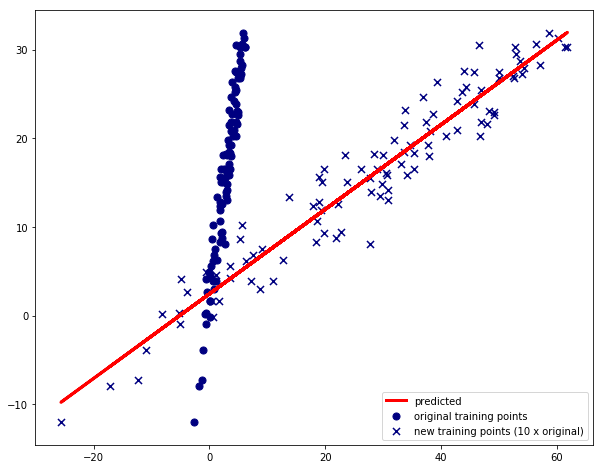

In [43]:
lw=3
plt.scatter(a, y, color='navy', s=50, marker='o', label="original training points")
plt.scatter(b, y, color='navy', s=50, marker='x', label="new training points (10 x original)")
plt.plot(b, m.predict(X), color='red', linewidth=lw, label="predicted")
plt.legend(loc='lower right')

### z-score

In [44]:
np.mean(a)

2.802048952572593

In [21]:
np.std(a)

1.8622501250418932

In [46]:
# new coefficient
4.77 * np.std(a)

9.638279676825102

In [47]:
# new bias
2.44 + np.mean(a)*4.77

15.805773503771267

In [48]:
b = (a - np.mean(a)) / np.std(a)
X = b.reshape(-1, 1)
m = LinearRegression()
m.fit(X, y)
print(m.coef_)
print(m.intercept_)

[9.63748393]
15.800604363797781


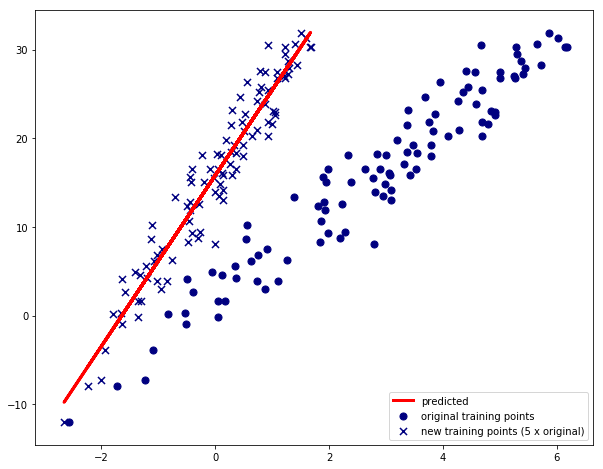

In [49]:
lw=3
plt.scatter(a, y, color='navy', s=50, marker='o', label="original training points")
plt.scatter(b, y, color='navy', s=50, marker='x', label="new training points (5 x original)")
plt.plot(b, m.predict(X), color='red', linewidth=lw, label="predicted")
plt.legend(loc='lower right')

## Multiple Features

### Independent Causes

In [50]:
N = 10000
# a and b are independent causes of y
a = np.random.normal(3, 2, N)
b = np.random.normal(4, 1, N)
X = np.hstack((a.reshape(-1, 1), b.reshape(-1, 1)))
y = np.random.normal(5*a - 3*b + 1, 3)

In [51]:
m = LinearRegression()
m.fit(X, y)
print(m.coef_)
print(m.intercept_)

[ 4.97464983 -2.96433061]
0.9832673968712644


In [52]:
N = 10000
# c is a cause of b and a and b are causes of y
a = np.random.normal(3, 2, N)
c = np.random.normal(4, 1, N)
b = np.random.normal(2*c, 1)
y = np.random.normal(5*a - 3*b + 1, 3)

In [53]:
X = np.hstack((a.reshape(-1, 1), b.reshape(-1, 1)))

In [54]:
m = LinearRegression()
m.fit(X, y)
print(m.coef_)
print(m.intercept_)

[ 4.98879783 -2.97988755]
0.8121897785888557


In [55]:
X = np.hstack((a.reshape(-1, 1), c.reshape(-1, 1)))

In [56]:
m = LinearRegression()
m.fit(X, y)
print(m.coef_)
print(m.intercept_)

[ 4.98458161 -5.91810117]
0.6148895241789845


As expected, c's weight is around -6.

In [57]:
X = np.hstack((a.reshape(-1, 1), b.reshape(-1, 1), c.reshape(-1, 1)))

In [58]:
m = LinearRegression()
m.fit(X, y)
print(m.coef_)
print(m.intercept_)

[ 4.98880792 -2.99048153  0.02634661]
0.7916678376909889


If b is known, c becomes useless.

## Z-scoring

In [59]:
N = 10000
a = np.random.normal(3, 2, N)
b = np.random.normal(3, 5, N)
y = np.random.normal(5*a - 3*b + 1, 3)
X = np.hstack((a.reshape(-1, 1), b.reshape(-1, 1)))

In [60]:
m = LinearRegression()
m.fit(X, y)
print(m.coef_)
print(m.intercept_)

[ 5.01157296 -3.00151792]
0.9720271052883911


_Which feature is more important do you think? How does the variance of the feature factor into its importance?_

In [61]:
from sklearn.feature_selection import mutual_info_regression

In [62]:
mutual_info_regression(X, y)

array([0.18609155, 0.54872717])

Let's z-score: subtract mean, divide by std

In [63]:
np.mean(X, axis=0)

array([2.98444015, 3.00438997])

In [64]:
np.std(X, axis=0)

array([2.01048801, 4.9237178 ])

In [65]:
Xz = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

In [66]:
mutual_info_regression(Xz, y)

array([0.18609155, 0.54872717])

Scaling does not affect mutual info.

In [67]:
m = LinearRegression()
m.fit(Xz, y)
print(m.coef_)
print(m.intercept_)

[ 10.07570735 -14.77862723]
6.911036316787548


_Which feature is more important now?_

_Should you z-score?_

_Why subtract the mean?_

### Noisy observation of y

In [68]:
d = np.random.normal(0.25*y+2, 100)

In [69]:
X = np.hstack((a.reshape(-1, 1), b.reshape(-1, 1), c.reshape(-1, 1), d.reshape(-1, 1)))

In [70]:
m = LinearRegression()
m.fit(X, y)
print(m.coef_)
print(m.intercept_)

[ 5.01146508e+00 -3.00138866e+00 -1.06524659e-02  1.99636564e-04]
1.0141088499593787


d is useless and it doesn't affect the weights of others.

In [71]:
d = np.random.normal(0.25*y+2, 0.01)

In [72]:
X = np.hstack((a.reshape(-1, 1), b.reshape(-1, 1), c.reshape(-1, 1), d.reshape(-1, 1)))

In [73]:
m = LinearRegression()
m.fit(X, y)
print(m.coef_)
print(m.intercept_)

[ 1.40604195e-03 -6.61301865e-04  1.52366286e-04  3.99918585e+00]
-8.000074388819481


d is extremely informative and other features are not needed anymore. Note that d's weight is 1/0.25 = 4.

# Decision Tree Regressor

In [74]:
import graphviz
from sklearn import tree

In [75]:
X = np.hstack((a.reshape(-1, 1), b.reshape(-1, 1), c.reshape(-1, 1)))

In [80]:
m = tree.DecisionTreeRegressor(max_depth=3)
m.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

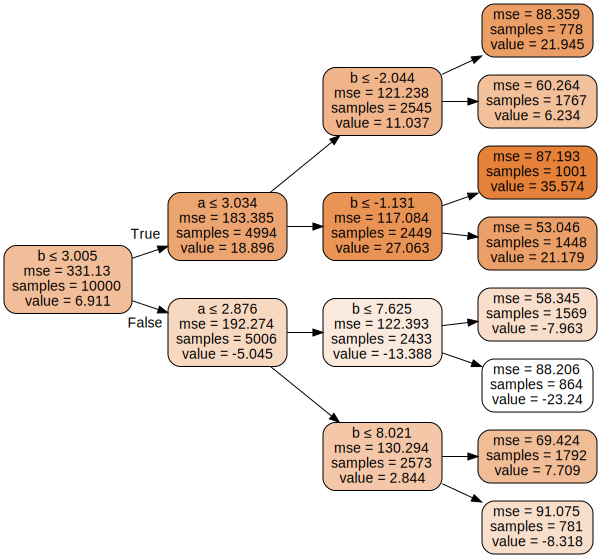

In [81]:
dot_data = tree.export_graphviz(m, out_file=None, 
                                feature_names=['a', 'b', 'c'],
                                max_depth=None, 
                                filled=True, rounded=True, rotate=True, special_characters=True)  
graph = graphviz.Source(dot_data)
#graph.render()
graph

In [82]:
m.feature_importances_

array([0.24917963, 0.75082037, 0.        ])

# Regularization

In [83]:
from sklearn.linear_model import Ridge, Lasso

In [84]:
e = np.random.normal(2, 1, N)

In [85]:
X = np.hstack((a.reshape(-1, 1), b.reshape(-1, 1), c.reshape(-1, 1), e.reshape(-1, 1)))

In [86]:
m = LinearRegression()
m.fit(X, y)
print(m.coef_)
print(m.intercept_)

[ 5.01129834 -3.00157686 -0.00892086 -0.05295769]
1.1143437167460153


In [87]:
np.mean((y-m.predict(X))**2)

8.852333552796617

In [102]:
alpha = 100000000000
m = Ridge(alpha=alpha)
m.fit(X, y)
print(m.coef_)
print(m.intercept_)

[ 2.04912221e-06 -7.31565548e-06  2.91543036e-09 -8.48094913e-09]
6.911052185633574


In [103]:
np.mean(y)

6.911036316787558

In [104]:
np.mean((y-m.predict(X))**2)

331.1286364962415

In [110]:
alpha = 1
m = Lasso(alpha=alpha)
m.fit(X, y)
print(m.coef_)
print(m.intercept_)

[ 4.76495524 -2.96106245 -0.         -0.        ]
1.5864989400479645


In [111]:
np.mean((y-m.predict(X))**2)

9.142322116970023

# Real Datasets

In [112]:
from sklearn.datasets import load_boston

In [113]:
boston = load_boston()

In [114]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [285]:
X = boston.data
y = boston.target
feature_names = boston.feature_names

In [286]:
np.mean(y)

22.532806324110677

In [287]:
xmean = np.mean(X, axis=0)
xstd = np.std(X, axis=0)
for i in range(X.shape[1]):
    print("%s\t%0.2f +- %0.2f" %(feature_names[i], xmean[i], xstd[i]))

CRIM	3.61 +- 8.59
ZN	11.36 +- 23.30
INDUS	11.14 +- 6.85
CHAS	0.07 +- 0.25
NOX	0.55 +- 0.12
RM	6.28 +- 0.70
AGE	68.57 +- 28.12
DIS	3.80 +- 2.10
RAD	9.55 +- 8.70
TAX	408.24 +- 168.37
PTRATIO	18.46 +- 2.16
B	356.67 +- 91.20
LSTAT	12.65 +- 7.13


In [288]:
m = LinearRegression()
m.fit(X, y)

ind = np.argsort(np.abs(m.coef_))

for i in ind[::-1]:
    print("%s:\t%.2f" %(feature_names[i], m.coef_[i]))

print(m.intercept_)

NOX:	-17.77
RM:	3.81
CHAS:	2.69
DIS:	-1.48
PTRATIO:	-0.95
LSTAT:	-0.52
RAD:	0.31
CRIM:	-0.11
ZN:	0.05
INDUS:	0.02
TAX:	-0.01
B:	0.01
AGE:	0.00
36.45948838509001


In [289]:
Xz = (X - np.mean(X, axis=0))/np.std(X, axis=0)

In [291]:
m = LinearRegression()
m.fit(Xz, y)

ind = np.argsort(np.abs(m.coef_))

for i in ind[::-1]:
    print("%s:\t%.2f" %(feature_names[i], m.coef_[i]))

print(m.intercept_)

LSTAT:	-3.74
DIS:	-3.10
RM:	2.67
RAD:	2.66
TAX:	-2.08
PTRATIO:	-2.06
NOX:	-2.06
ZN:	1.08
CRIM:	-0.93
B:	0.85
CHAS:	0.68
INDUS:	0.14
AGE:	0.02
22.532806324110684


In [293]:
mis = mutual_info_regression(X, y)
ind = np.argsort(mis)

for i in ind[::-1]:
    print("%s:\t%.2f" %(feature_names[i], mis[i]))
    


LSTAT:	0.67
RM:	0.53
INDUS:	0.47
NOX:	0.47
PTRATIO:	0.44
TAX:	0.36
CRIM:	0.33
AGE:	0.31
DIS:	0.30
RAD:	0.23
ZN:	0.20
B:	0.16
CHAS:	0.03


Next: given a particular object, accumulate positive and negative, and print.